# Imports

In [7]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import torch
import time
import pytorch_lightning as pl
from pytorch_lightning import loggers
import config
from utils.Visual import draw_plot

# Run Adversarial Training

In [9]:
from utils.TrainHelper import TrainHelper, get_all_models_data
th = TrainHelper()

In [10]:
##############################################################################################################
##############################################################################################################
##############################################################################################################

from attacks.pgd import ProjectedGradientDescent

from classification.models.M5 import M5PLModule
from classification.models.SpectrogramCNN import SpectrogramCNNPLModule
from classification.models.CRNN import CRNNPLModule
from classification.models.DeepRecursiveCNN import DeepRecursiveCNNPLModule

# define hyperparameters
hparams = {
    "batch_size": 24,
    "epochs": 20,
    "learning_rate": 0.002,
    "lr_decay": 1,
    "weight_decay": 0.01
}

# define attack configs
attack_configs = []
for i in range(20):
    epsilon = 0.1 + (i)/100
    attack_configs.append(
                      {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[epsilon], "num_iter": [1]
                                     },
                       "META": {"TITLE": f"L_inf_eps={epsilon}_iters=1"}
                       },
    )

In [ ]:
models = th.run(CRNNPLModule, hparams, attack_configs, save_epochs = [10,20])
##############################################################################################################
##############################################################################################################
##############################################################################################################

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name                      | Type                  | Params
----------------------------------------------------------------
0  | model                     | CRNN                  | 105 K 
1  | model.spec                | MelspectrogramStretch | 0     
2  | model.spec.spectrogram    | Spectrogram           | 0     
3  | model.spec.mel_scale      | MelScale              | 0     
4  | model.spec.stft           | Spectrogram           | 0     
5  | model.spec.random_stretch | RandomTimeStretch     | 0   

loaded!
Training Models with Attack ProjectedGradientDescent (1 of 20)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.015411973918197985


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


# Create Plots

In [3]:
#state_dict_path = '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN/vanilla0.886.p'

In [2]:
#from classification.models.DeepRecursiveCNN import DeepRecursiveCNNPLModule
#state_dict_path = "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/DeepRecursiveCNN/DeepRecursiveCNN_attack_L_inf_eps=0.1_iters=1_v4.p"

In [1]:
#from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
#experiment = load_experiment(exp_folder = "0022_EVAL_EASY_FINAL")
#experiment.run(state_dict_path, DeepRecursiveCNNPLModule)

In [11]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
experiment = load_experiment(exp_folder = "0022_EVAL_EASY_FINAL")
for m in models:
    experiment.run(m, CRNNPLModule)

Loaded model 0022_EVAL_EASY_FINAL


NameError: name 'models' is not defined

In [12]:
experiment.show_best_models(best_n=100, metric="acc")


Attack = FGSM:
[(6.92294013040901, 'CRNN_attack_L_inf_eps=0.12000000000000001_iters=1_v34.p'), (6.872554831061055, 'SpectrogramCNN_attack_Spectogram_v6.p'), (6.812685240071133, 'CRNN_attack_L_inf_eps=0.1_iters=1_v10.p'), (6.803793716656788, 'CRNN_attack_L_inf_eps=0.07_iters=2_v29.p'), (6.713100177830468, 'CRNN_attack_L_inf_eps=0.2_iters=1_v26.p'), (6.542975696502668, 'M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p'), (6.334914048606994, 'CRNN_attack_L_inf_eps=0.1_iters=1_v32.p'), (6.28275044457617, 'vanilla_0.878.p'), (5.797273266152934, 'CRNN_attack_L_inf_eps=0.13_iters=1_v35.p'), (5.7231772377000585, 'CRNN_attack_L_inf_eps=0.03_iters=2_v30.p'), (5.562537048014226, 'CRNN_attack_L_inf_eps=0.14_iters=1_v36.p'), (5.385892116182573, 'DeepRecursiveCNN_attack_L_inf_eps=0.1_iters=1_v4.p'), (4.9187907528156485, 'SpectrogramCNN_8K_LONG'), (4.864848844101956, 'CRNN_attack_L_inf_eps=0.05_iters=2_v28.p'), (4.679312388855957, 'CRNN_attack_L_inf_eps=0.11_iters=1_v33.p'), (4.593953764078246, 'Spectr

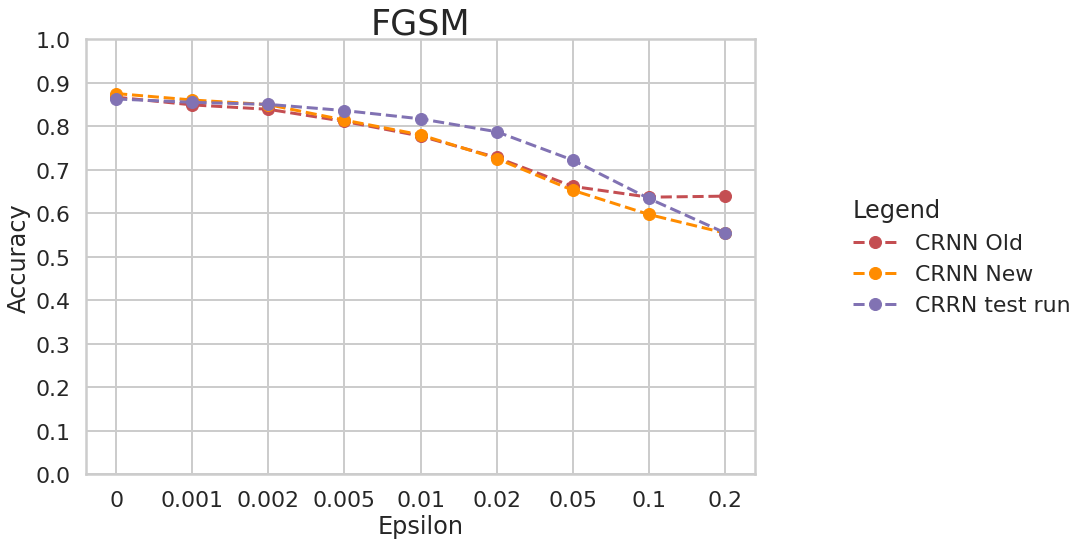

In [13]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                       #('M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p', "M5 Adv"),
                       #("DeepRecursiveCNN_attack_L_inf_eps=0.1_iters=1_v4.p", "DeepRec Adv"),
                       #('SpectrogramCNN_attack_Spectogram_v6.p', "SpectrogramCNN Adv"),
                       ('CRNN_attack_L_inf_eps=0.1_iters=1_v10.p', "CRNN Old"),
                       ('CRNN_attack_L_inf_eps=0.2_iters=1_v26.p', "CRNN New"),
                       ('CRNN_attack_L_inf_eps=0.12000000000000001_iters=1_v34.p', "CRRN test run")
                       #('CRNN_attack_L_inf_eps=0.05_iters=3_v31.p', "CRNN New1"),
                       #('CRNN_attack_L_inf_eps=0.2_iters=1_v26.p', "CRNN New2"),
                       #('CRNN_attack_L_inf_eps=0.05_iters=2_v28.p', "CRNN New3"),
                       #("M5_vanilla.p", "M5 vanilla")
                         ])

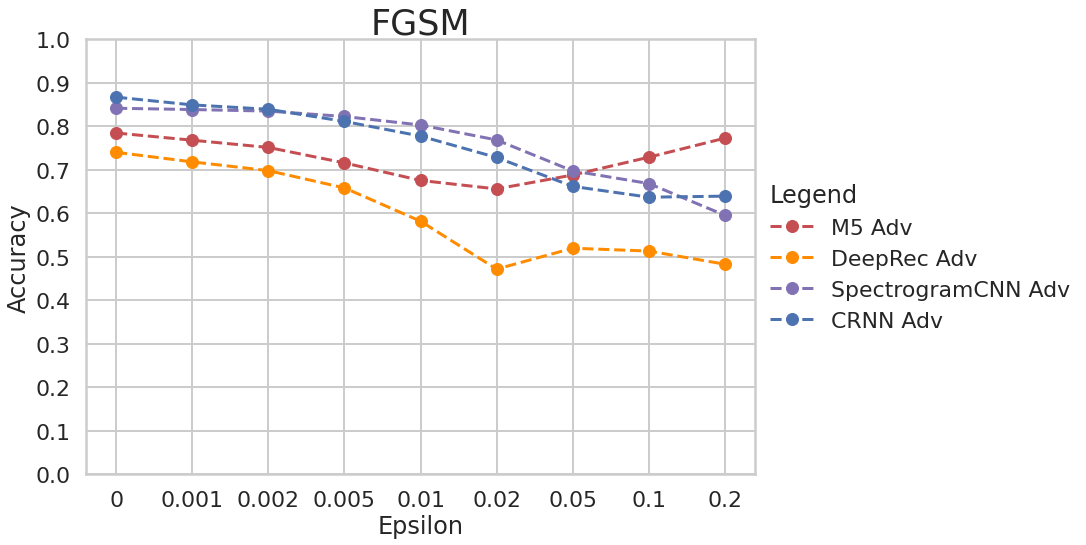

In [32]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                       ('M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p', "M5 Adv"),
                       ("DeepRecursiveCNN_attack_L_inf_eps=0.1_iters=1_v4.p", "DeepRec Adv"),
                       ('SpectrogramCNN_attack_Spectogram_v6.p', "SpectrogramCNN Adv"),
                       ('CRNN_attack_L_inf_eps=0.1_iters=1_v10.p', "CRNN Adv"),
                         ])